In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
# download the csv file at https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn/data
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [313]:
df.shape

(7043, 21)

In [312]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [314]:
df.shape

(7043, 21)

In [358]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

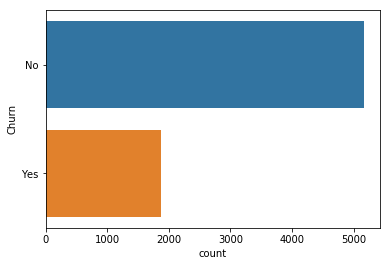

In [317]:
sns.countplot(y='Churn', data=df)

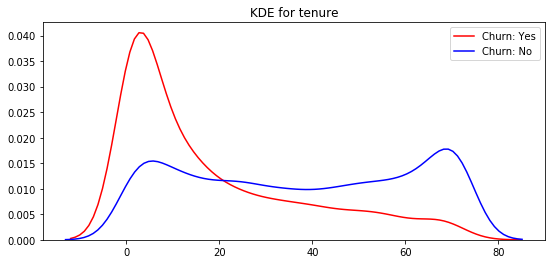

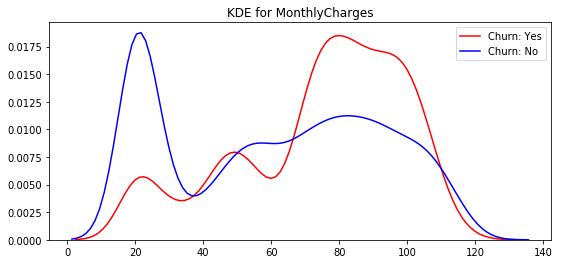

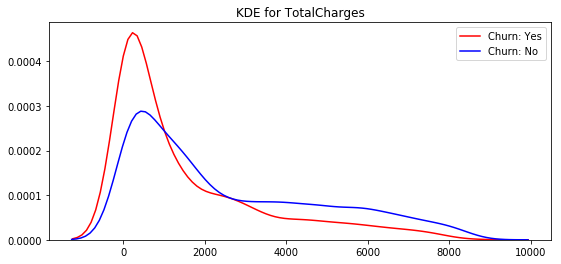

In [321]:
def plot_kde(column):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {column}")
    sns.kdeplot(df[df.Churn=='Yes'][column], label='Churn: Yes', color='r')
    sns.kdeplot(df[df.Churn=='No'][column], label='Churn: No', color='b')
#     sns.kdeplot(x=column, data=df, hue='Churn')
    
plot_kde('tenure') # lower tenure means more likely to churn
plot_kde('MonthlyCharges') # more monthly charge means more likely to churn
plot_kde('TotalCharges')

## Gender and Age (Senior Citizen)

In [323]:
df['gender'].describe()

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

In [ ]:
sns.countplot(x='SeniorCitizen', data=df, hue='Churn') # not a senior citizen is more likely to churn

In [324]:
SENIOR_CITIZEN = 'SeniorCitizen'
GENDER = 'gender'
CHURN = 'Churn'
PARTNER = 'Partner'
DEPENDENTS = 'Dependents'
PhoneService = 'PhoneService'
MultipleLines = 'MultipleLines'
MonthlyCharges = 'MonthlyCharges'
InternetService = 'InternetService'
PaymentMethod = 'PaymentMethod'
Contract = 'Contract'

   SeniorCitizen Churn  percentage of customer
0              0    No                0.640068
1              0   Yes                0.197785
2              1    No                0.094562
3              1   Yes                0.067585


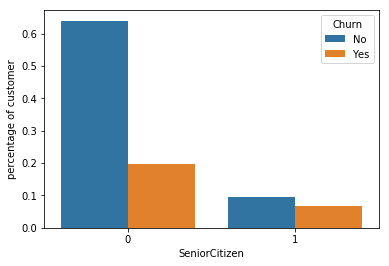

In [331]:
axis_name = 'percentage of customer'
g = df.groupby('SeniorCitizen')["Churn"].value_counts().to_frame()
g = g.rename({'Churn': axis_name}, axis=1).reset_index()
g[axis_name] /= len(df)
print(g)
sns.barplot(x=SENIOR_CITIZEN, y=axis_name, data=g, hue='Churn')
# sns.catplot(x=CHURN, )
# g[axis_name] /= len(df)
# sns.barplot(x='SeniorCitizen', y=axis_name, data=g, hue='Churn')

In [ ]:
sns.countplot(data=df, x=SENIOR_CITIZEN, )

/Users/kdang/.virtualenvs/torch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


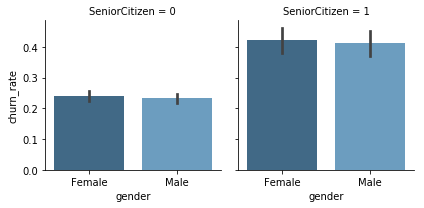

In [332]:
axis_name = 'churn_rate'
df[axis_name] = df[CHURN].replace("No", 0).replace("Yes", 1)
fg = sns.FacetGrid(df, col=SENIOR_CITIZEN)
fg.map(sns.barplot, GENDER, axis_name, palette = "Blues_d", order= ['Female', 'Male']) # => senior citizen is more likely to churn

/Users/kdang/.virtualenvs/torch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


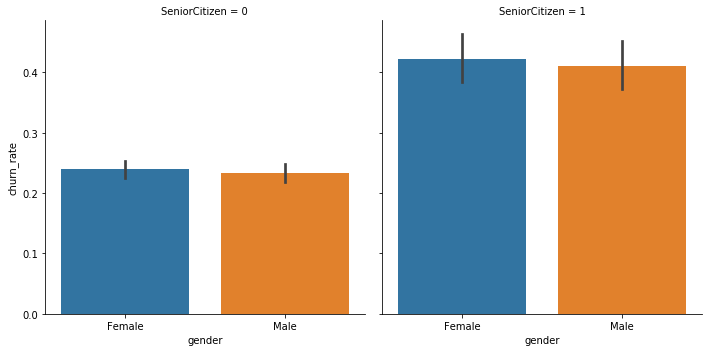

In [333]:
sns.catplot(x=GENDER, y='churn_rate', col=SENIOR_CITIZEN, kind='bar', data=df)

In [ ]:
print('senior citizen churn rate', len(df.query(f'{SENIOR_CITIZEN}==1 & {CHURN}=="Yes"'))/ \
      len(df.query(f'{SENIOR_CITIZEN}==1')))
print('non-senior citizen churn rate', len(df.query(f'{SENIOR_CITIZEN}==0 & {CHURN}=="Yes"'))/ \
      len(df.query(f'{SENIOR_CITIZEN}==0')))

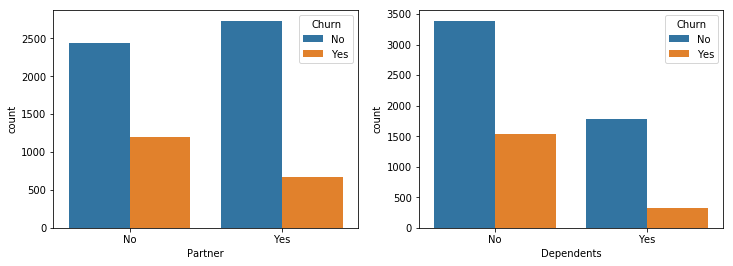

In [334]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=PARTNER, data=df, hue=CHURN, order=['No', 'Yes']) 
plt.subplot(1, 2, 2)
sns.countplot(x=DEPENDENTS, data=df, hue=CHURN, order=['No', 'Yes'])

## Phone services

In [335]:
df.groupby([PhoneService])[CHURN].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

In [336]:
df.groupby([MultipleLines])[CHURN].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

## churn by phone lines

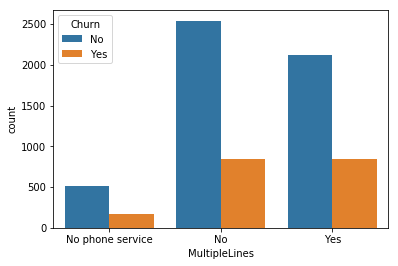

In [337]:
sns.countplot(x=MultipleLines, data=df, hue=CHURN)

/Users/kdang/.virtualenvs/torch/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


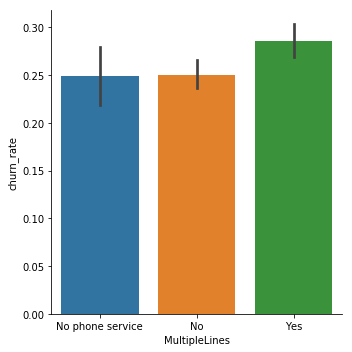

In [338]:
sns.factorplot(x=MultipleLines, y='churn_rate', data=df, kind='bar')

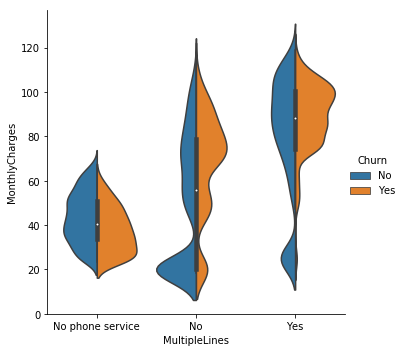

In [339]:
sns.catplot(x=MultipleLines, y=MonthlyCharges, data=df, hue=CHURN, kind='violin', split=True)

## Internet service

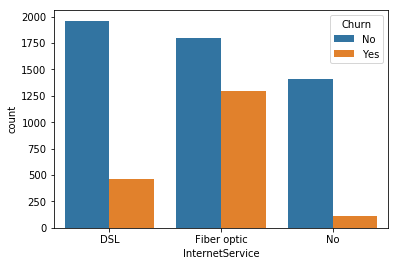

In [340]:
sns.countplot(x=InternetService, data=df, hue=CHURN)

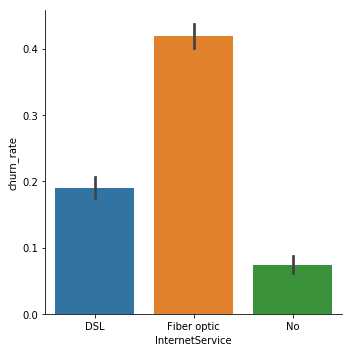

In [341]:
sns.catplot(x=InternetService, y='churn_rate', data=df, kind='bar')

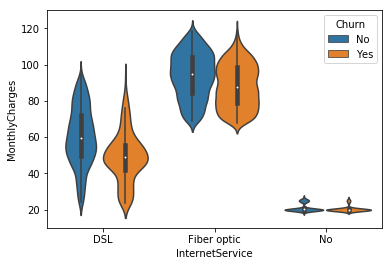

In [342]:
sns.violinplot(x=InternetService, y=MonthlyCharges, data=df, hue=CHURN)

### => Customer with DSL connection with Higher charges are less probable to churn?

## Internet additional services

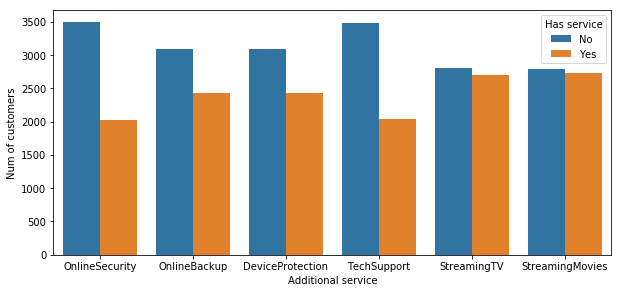

In [343]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

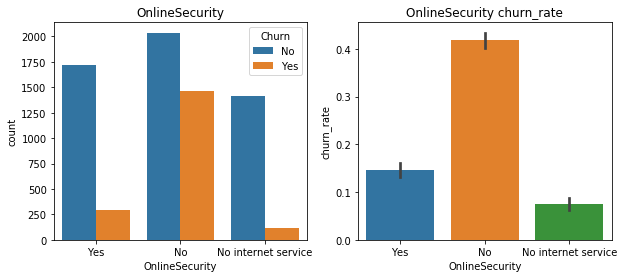

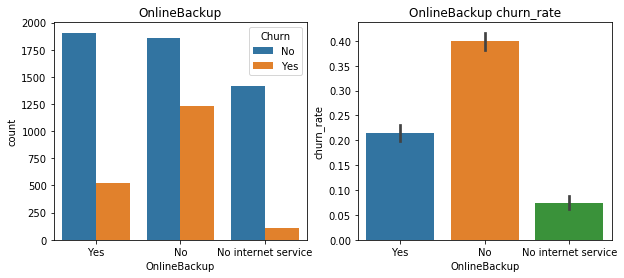

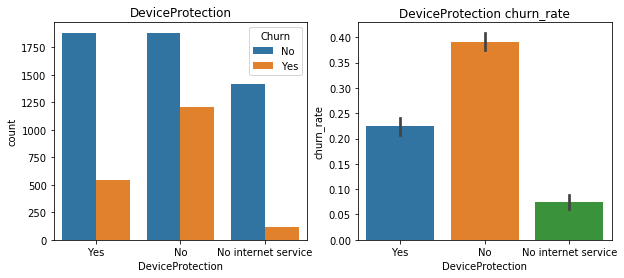

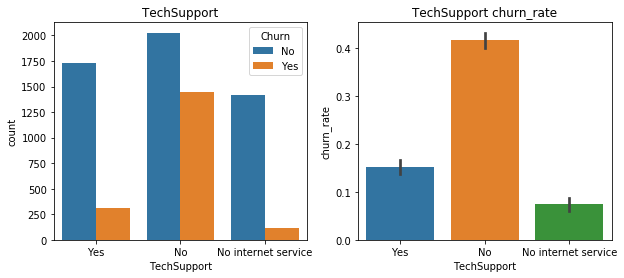

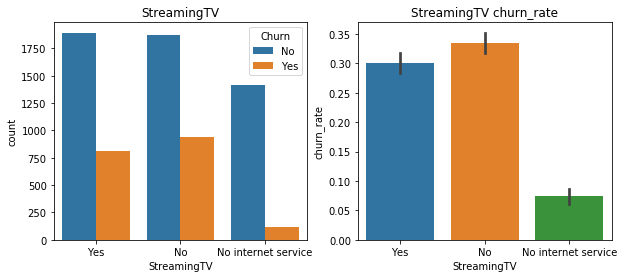

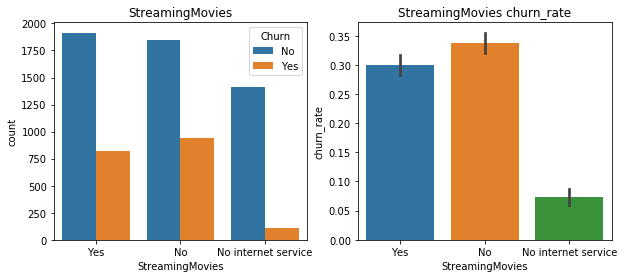

In [344]:
def draw_additional_service(service):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.set_title(service)
    sns.countplot(x=service, data=df, hue=CHURN, ax=ax1, order=('Yes', 'No', 'No internet service'))
    ax2.set_title(service+' churn_rate')
    sns.barplot(x=service, y='churn_rate', data=df, ax=ax2, order=('Yes', 'No', 'No internet service'))
    
for service in ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'):
    draw_additional_service(service)

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               1             2                 1            1            1   
1               2             1                 2            1            1   
2               2             2                 1            1            1   
3               2             1                 2            2            1   
4               1             1                 1            1            1   

   StreamingMovies  
0                1  
1                1  
2                1  
3                1  
4                1  


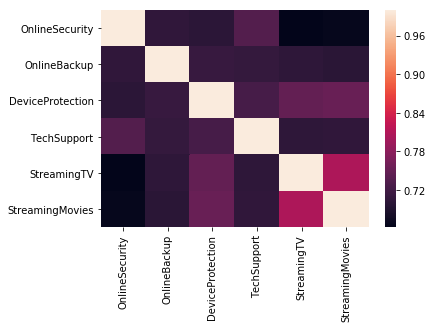

In [345]:
col_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_services = df[col_services]
df_services = df_services.replace('Yes', 2).replace('No', 1).replace('No internet service', 0)
print(df_services.head())
sns.heatmap(df_services.corr())
# for col in col_services:
#     df_services[col] = df_services[col].astype('float')

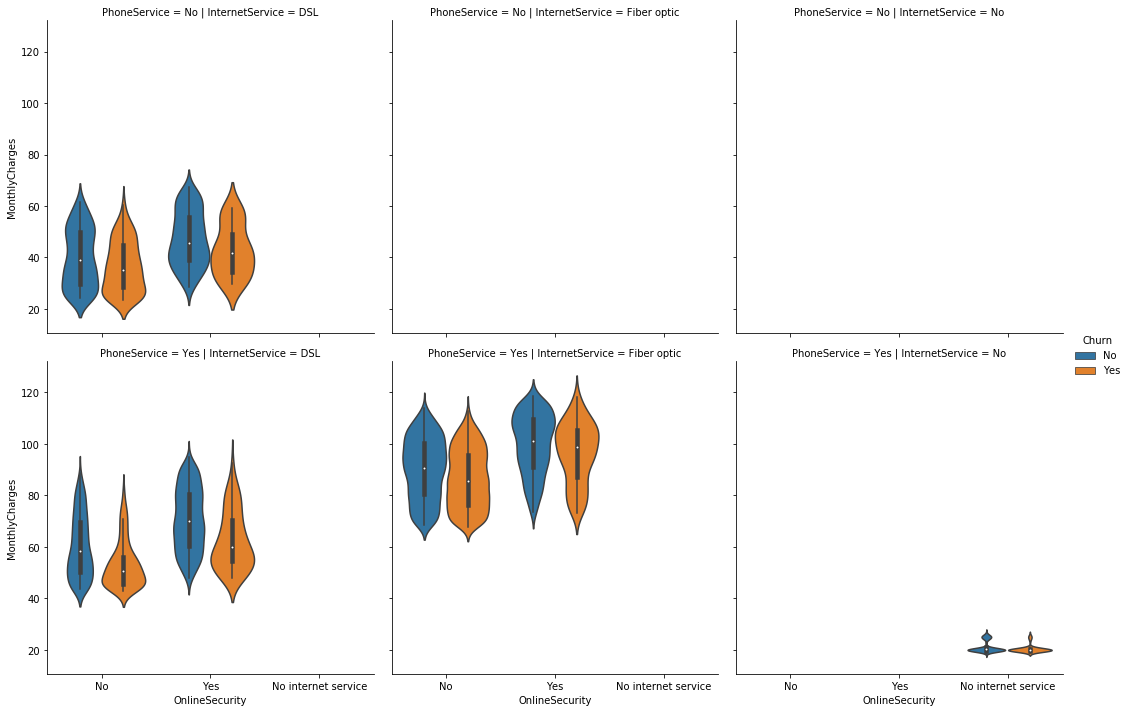

In [346]:
sns.catplot(x='OnlineSecurity', y='MonthlyCharges', data=df, hue=CHURN, kind='violin', col='InternetService', row='PhoneService')

## Payment methods

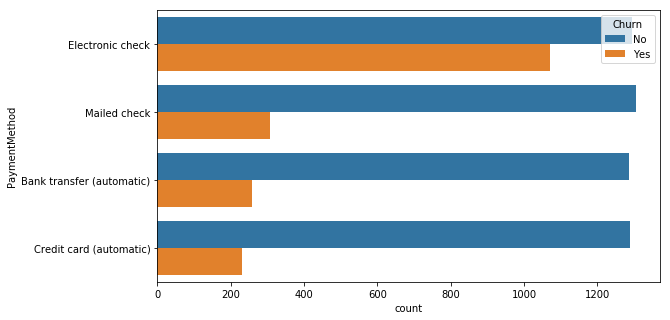

In [347]:
plt.figure(figsize=(9,5 ))
sns.countplot(y=PaymentMethod, data=df, hue=CHURN)

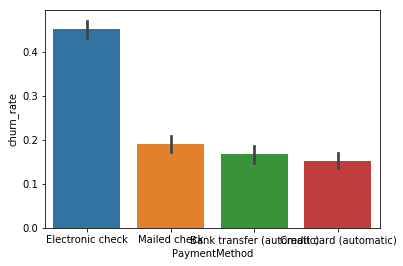

In [348]:
sns.barplot(y='churn_rate', data=df, x=PaymentMethod)

### => electronic check is highly likely to churn

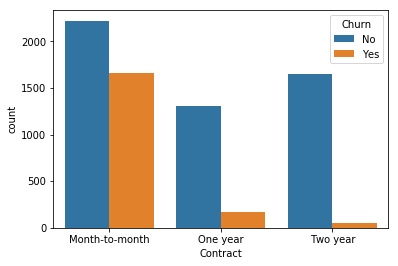

In [349]:
sns.countplot(x=Contract, data=df, hue=CHURN)

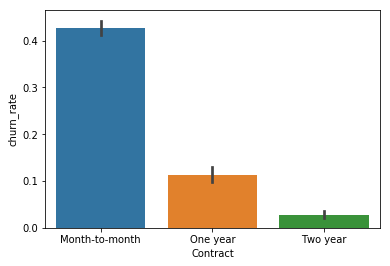

In [350]:
sns.barplot(x=Contract, y='churn_rate', data=df)

### => shorter contract is highly likely to churn compare to longer durations

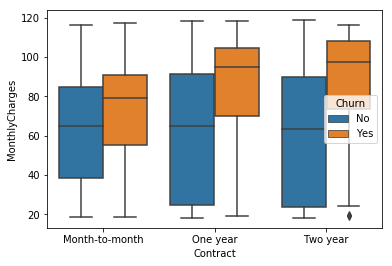

In [351]:
sns.boxplot(x=Contract, y='MonthlyCharges', data=df, hue='Churn')

### => people who churned has higher monthly charges

/Users/kdang/.virtualenvs/torch/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


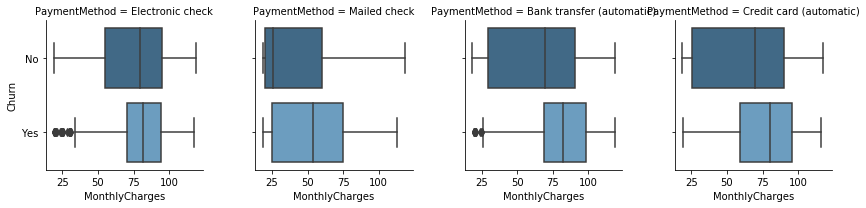

In [352]:
g = sns.FacetGrid(df, col=PaymentMethod)
g.map(sns.boxplot, MonthlyCharges, CHURN, palette = "Blues_d")

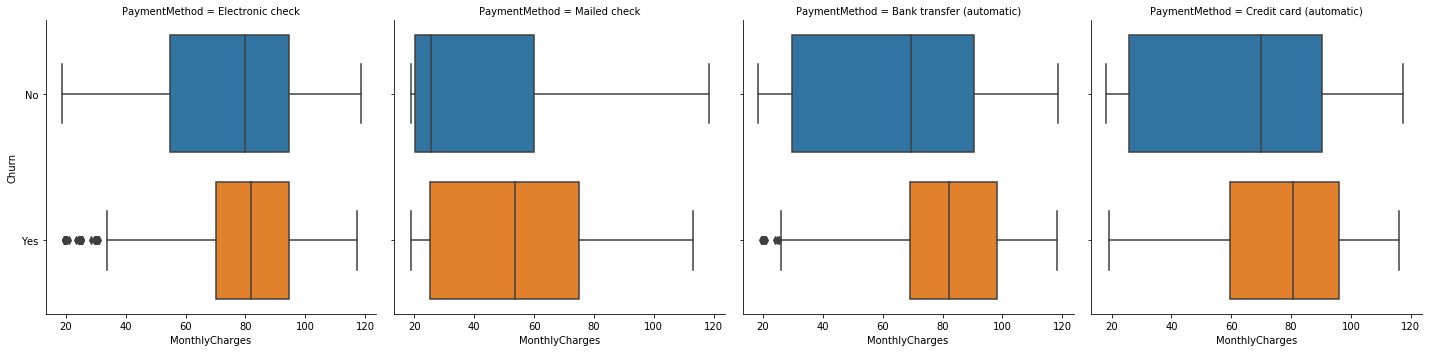

In [353]:
sns.catplot(x=MonthlyCharges, y=CHURN, data=df, col=PaymentMethod, kind='box')

In [ ]:
sns.catplot(x=MonthlyCharges, y=CHURN, data=df, row=PaymentMethod, kind='box', height=1.5, aspect=4)

In [354]:
pd.get_dummies(df).shape

(7043, 7091)

In [ ]:
df.head()

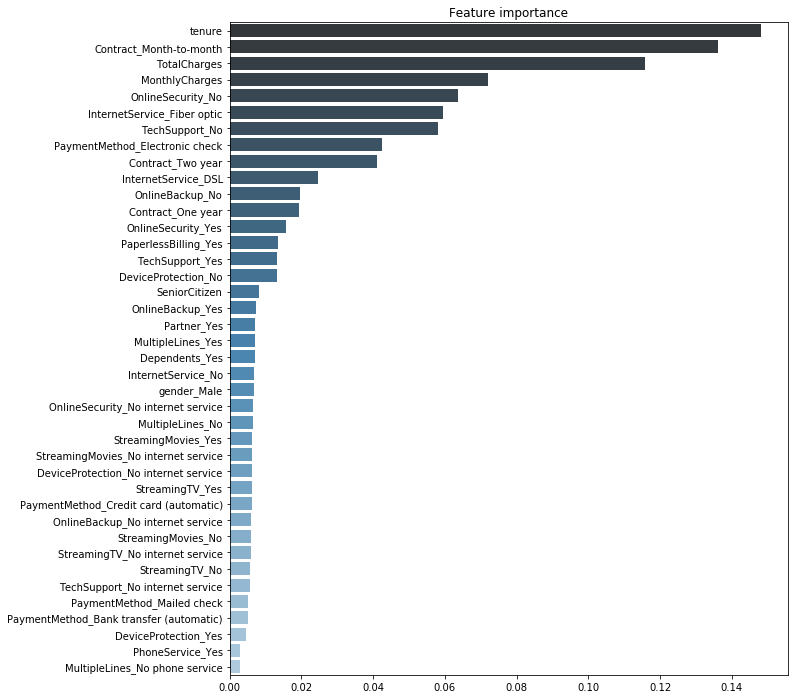

In [359]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
df.drop(['customerID'], inplace=True, axis=1)
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [ ]:
df.shape